In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout
from tensorflow.keras.models import Model

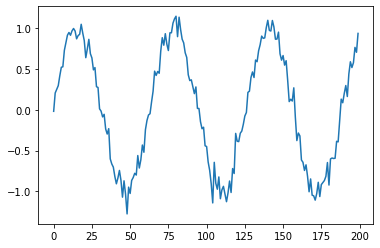

In [ ]:
series=np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [ ]:
T=10
X=[]
Y=[]

for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print(X.shape)
print(Y.shape)

(190, 10)
(190,)


In [ ]:
i = Input(shape=(T,))
x = Dense(10,activation='relu')(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(optimizer=tf.optimizers.Adam(lr=0.1),
        loss='mse')

r=model.fit(X[:-N//2], Y[:-N//2], 
            validation_data=(X[ -N //2 :],Y[-N//2:]),
            epochs=80)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 161ms/step - loss: 1.1952 - val_loss: 0.8827
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.3041 - val_loss: 0.4031
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 0.2759 - val_loss: 0.3070
Epoch 4/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1501 - val_loss: 0.0744
Epoch 5/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0545 - val_loss: 0.1005
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0597 - val_loss: 0.0787
Epoch 7/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0405 - val_loss: 0.0316
Epoch 8/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0227 - val_loss: 0.0347
Epoch 9/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0314 - val_loss: 0.0464
Epoch 10/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0301 - val_loss: 0.0301
Epoch 11/80
3/3 [======================

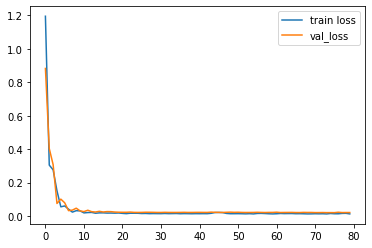

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

In [ ]:
validation_target=Y[-N//2:]

validation_prediction=[]
last_x=X[-N//2]

while len(validation_prediction)<len(validation_target):
  p=model.predict(last_x.reshape(1,-1))[0,0]
  validation_prediction.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

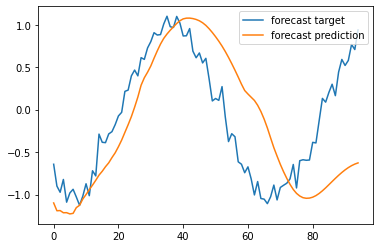

In [ ]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_prediction,label='forecast prediction')
plt.legend()